In [5]:
!pip install gensim 


In [101]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [102]:
paragraph = """The COVID-19 pandemic marks an unprecedented time in modern history that will require 
the best of humanity to overcome. The new coronavirus has taken thousands of lives and spread to nearly 
every State of India. Your donation to this fund will support immediate and long-term relief and recovery 
in vulnerable communities during one of the most challenging times we have collectively faced.We at HLFPPT,
a national not-for-profit NGO working in India since last 28 years (promoted by HLL Lifecare Limited, a Govt.
of India Enterprises) is seeking Immediate Fund Support to extend our help to the marginalised and 
underprivileged/migrated labourer to live a healthy and safe life ahead. 
Not just this, we have more than 5000 Volunteer Health Workers associated with us, who are providing door-to-door 
medical help and free consultation in this COVID Crisis.'
For both of them, immediate Donation is required to provide support through the volunteer at cluster/block 
level in India.a) Health Worker Protection Kit- Health workers are more vulnerable towards Corona, as they 
visit and provide essential medical help to the targeted population . Hence, it is critical to support them
with required protective gears when they move in field. The Kit will includes- #Mask-5 pc/ or N-95, #PPE Kit-1 set,
#Hand Sanitiser, Soap, #Dettol, Towel, Gloves etc"""

In [103]:
# Preprocessing the data
text =  re.sub(r'\[[0-9]*\]',' ',paragraph )
text = re.sub(r'\s+',' ',text)
text =  text.lower()


text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [104]:
text

"the covid- pandemic marks an unprecedented time in modern history that will require the best of humanity to overcome. the new coronavirus has taken thousands of lives and spread to nearly every state of india. your donation to this fund will support immediate and long-term relief and recovery in vulnerable communities during one of the most challenging times we have collectively faced.we at hlfppt, a national not-for-profit ngo working in india since last years (promoted by hll lifecare limited, a govt. of india enterprises) is seeking immediate fund support to extend our help to the marginalised and underprivileged/migrated labourer to live a healthy and safe life ahead. not just this, we have more than volunteer health workers associated with us, who are providing door-to-door medical help and free consultation in this covid crisis.' for both of them, immediate donation is required to provide support through the volunteer at cluster/block level in india.a) health worker protection k

In [105]:
# Preparing the dataset
sentences=  nltk.sent_tokenize(text)
sentences

['the covid- pandemic marks an unprecedented time in modern history that will require the best of humanity to overcome.',
 'the new coronavirus has taken thousands of lives and spread to nearly every state of india.',
 'your donation to this fund will support immediate and long-term relief and recovery in vulnerable communities during one of the most challenging times we have collectively faced.we at hlfppt, a national not-for-profit ngo working in india since last years (promoted by hll lifecare limited, a govt.',
 'of india enterprises) is seeking immediate fund support to extend our help to the marginalised and underprivileged/migrated labourer to live a healthy and safe life ahead.',
 "not just this, we have more than volunteer health workers associated with us, who are providing door-to-door medical help and free consultation in this covid crisis.'",
 'for both of them, immediate donation is required to provide support through the volunteer at cluster/block level in india.a) healt

In [106]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
sent_word

[['the',
  'covid-',
  'pandemic',
  'marks',
  'an',
  'unprecedented',
  'time',
  'in',
  'modern',
  'history',
  'that',
  'will',
  'require',
  'the',
  'best',
  'of',
  'humanity',
  'to',
  'overcome',
  '.'],
 ['the',
  'new',
  'coronavirus',
  'has',
  'taken',
  'thousands',
  'of',
  'lives',
  'and',
  'spread',
  'to',
  'nearly',
  'every',
  'state',
  'of',
  'india',
  '.'],
 ['your',
  'donation',
  'to',
  'this',
  'fund',
  'will',
  'support',
  'immediate',
  'and',
  'long-term',
  'relief',
  'and',
  'recovery',
  'in',
  'vulnerable',
  'communities',
  'during',
  'one',
  'of',
  'the',
  'most',
  'challenging',
  'times',
  'we',
  'have',
  'collectively',
  'faced.we',
  'at',
  'hlfppt',
  ',',
  'a',
  'national',
  'not-for-profit',
  'ngo',
  'working',
  'in',
  'india',
  'since',
  'last',
  'years',
  '(',
  'promoted',
  'by',
  'hll',
  'lifecare',
  'limited',
  ',',
  'a',
  'govt',
  '.'],
 ['of',
  'india',
  'enterprises',
  ')',
  'i

In [107]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i] if word not in stopwords.words('english')]
    

In [108]:
sent_word

[['covid-',
  'pandemic',
  'marks',
  'unprecedented',
  'time',
  'modern',
  'history',
  'require',
  'best',
  'humanity',
  'overcome',
  '.'],
 ['new',
  'coronavirus',
  'taken',
  'thousands',
  'lives',
  'spread',
  'nearly',
  'every',
  'state',
  'india',
  '.'],
 ['donation',
  'fund',
  'support',
  'immediate',
  'long-term',
  'relief',
  'recovery',
  'vulnerable',
  'communities',
  'one',
  'challenging',
  'times',
  'collectively',
  'faced.we',
  'hlfppt',
  ',',
  'national',
  'not-for-profit',
  'ngo',
  'working',
  'india',
  'since',
  'last',
  'years',
  '(',
  'promoted',
  'hll',
  'lifecare',
  'limited',
  ',',
  'govt',
  '.'],
 ['india',
  'enterprises',
  ')',
  'seeking',
  'immediate',
  'fund',
  'support',
  'extend',
  'help',
  'marginalised',
  'underprivileged/migrated',
  'labourer',
  'live',
  'healthy',
  'safe',
  'life',
  'ahead',
  '.'],
 [',',
  'volunteer',
  'health',
  'workers',
  'associated',
  'us',
  ',',
  'providing',
  

In [109]:
## Training the Word2Vec model
model = Word2Vec(sent_word,min_count=1)


words  = model.wv.vocab

In [110]:
# Test the word vector
vector = model.wv['coronavirus']
vector

array([-2.6406113e-03, -1.1455326e-03,  4.7817137e-03, -1.2692632e-04,
       -2.5663113e-03,  2.3276666e-03, -2.1425469e-03, -3.1695401e-03,
        1.4689973e-03, -1.4365291e-04, -1.7518072e-03, -2.2409572e-03,
       -2.5817230e-03, -3.7145235e-03,  3.4291262e-03,  1.4557015e-03,
       -3.3560249e-03, -1.1101505e-03,  8.5204985e-04, -4.2108637e-03,
       -3.8558093e-03,  4.5950674e-03, -2.4142617e-03,  4.5324168e-03,
        5.1959509e-05, -2.1607343e-03, -1.3926326e-03,  1.9907879e-03,
        3.1076726e-03,  1.4927989e-03,  1.8225135e-03,  3.7608640e-03,
       -3.9484221e-03, -2.1123986e-03,  1.3560494e-03,  3.8150325e-03,
        4.0250639e-03, -1.9076368e-03,  2.2657940e-03, -4.7822213e-03,
       -2.8968221e-03, -2.5216013e-03,  1.8153603e-03, -4.3341443e-03,
        3.1039596e-04,  5.2365748e-04,  3.6051506e-03,  4.0331637e-03,
        1.0698775e-03,  6.5371121e-04,  1.8731343e-03,  5.0487230e-05,
       -1.0772551e-03,  4.4904323e-04, -3.7127659e-03, -1.5993385e-03,
      

In [111]:
# Most similar words
similar = model.wv.most_similar('life',topn=6)

similar

[('visit', 0.23251797258853912),
 ('national', 0.21530351042747498),
 ('best', 0.20597228407859802),
 ('ahead', 0.20062099397182465),
 ('india.a', 0.18556474149227142),
 ('spread', 0.14072072505950928)]

In [112]:
smlt2 = model.wv.most_similar('workers')
smlt2

[('long-term', 0.2781841456890106),
 ('protective', 0.25312507152557373),
 ('overcome', 0.215415358543396),
 ('critical', 0.2134919911623001),
 ('last', 0.15800555050373077),
 ('modern', 0.14839628338813782),
 ('enterprises', 0.13706494867801666),
 ('medical', 0.13353484869003296),
 ('since', 0.12898124754428864),
 ('working', 0.12179587781429291)]

In [113]:
sml3= model.wv.most_similar('enterprises')
sml3

[('pandemic', 0.23968544602394104),
 ('mask-', 0.23571643233299255),
 ('taken', 0.22044509649276733),
 ('gears', 0.2106841653585434),
 ('govt', 0.20728960633277893),
 ('coronavirus', 0.18392375111579895),
 ('challenging', 0.16178928315639496),
 ('vulnerable', 0.15815860033035278),
 ('time', 0.14800171554088593),
 ('towards', 0.14089226722717285)]

In [114]:
sml4 = model.wv.most_similar('taken',topn=8)
sml4

[('extend', 0.2571864724159241),
 ('associated', 0.23383884131908417),
 ('enterprises', 0.22044509649276733),
 ('targeted', 0.21938200294971466),
 ('relief', 0.21600505709648132),
 ('.', 0.2076769471168518),
 ('towards', 0.18968911468982697),
 ('population', 0.18286150693893433)]

In [115]:
sml5 =model.wv.most_similar('associated',topn=8)
sml5

[('state', 0.27828818559646606),
 ('providing', 0.25912103056907654),
 ('taken', 0.23383882641792297),
 ('support', 0.20498985052108765),
 ('gloves', 0.20332521200180054),
 ('gears', 0.20082536339759827),
 ('hand', 0.1781502664089203),
 ('national', 0.16870439052581787)]

In [116]:
sml6 = model.wv.most_similar('support',topn=8)
sml6

[('cluster/block', 0.2373887598514557),
 ('covid-', 0.23208381235599518),
 ('immediate', 0.2218603491783142),
 ('includes-', 0.2064029425382614),
 ('associated', 0.20498985052108765),
 ('n-', 0.17843307554721832),
 ('india.a', 0.17353655397891998),
 ('labourer', 0.16083179414272308)]

In [117]:
sml7 = model.wv.most_similar('labourer')
sml7

[('kit-', 0.2286200225353241),
 ('providing', 0.21018420159816742),
 ('spread', 0.2011377364397049),
 ('recovery', 0.19943195581436157),
 ('india', 0.17632704973220825),
 ('seeking', 0.17423485219478607),
 ('long-term', 0.17094998061656952),
 ('towards', 0.16674044728279114),
 ('consultation', 0.16279330849647522),
 ('support', 0.16083179414272308)]

In [118]:
sml8 = model.wv.most_similar('spread',topn=8)
sml8

[('labourer', 0.2011377364397049),
 ('thousands', 0.19528397917747498),
 ('history', 0.1879408061504364),
 ('visit', 0.17602047324180603),
 ('live', 0.16372007131576538),
 ("'", 0.16250896453857422),
 ('recovery', 0.15763431787490845),
 ('field', 0.1512829065322876)]

In [119]:
sml9 =  model.wv.most_similar('history')
sml9

[('move', 0.21365684270858765),
 ('nearly', 0.2013266682624817),
 ('spread', 0.187940776348114),
 ('state', 0.13978365063667297),
 ('kit-', 0.1289225071668625),
 ('hlfppt', 0.12437114864587784),
 ('dettol', 0.12231142073869705),
 ('lifecare', 0.12230752408504486),
 ('seeking', 0.1216980591416359),
 ('marginalised', 0.11387784034013748)]

In [120]:
sml10 = model.wv.most_similar('lifecare')
sml10

[('towel', 0.24434903264045715),
 ('hand', 0.2169027477502823),
 ('last', 0.21670284867286682),
 ('ahead', 0.20960214734077454),
 ('govt', 0.19215354323387146),
 ('pandemic', 0.172149658203125),
 ('recovery', 0.1668066829442978),
 ('required', 0.15125054121017456),
 ('targeted', 0.1464819759130478),
 ('overcome', 0.13454711437225342)]

In [121]:
sml11 =  model.wv.most_similar('ahead')
sml11

[('lifecare', 0.20960213243961334),
 ('life', 0.20062099397182465),
 ('consultation', 0.17367826402187347),
 ('ppe', 0.16214004158973694),
 ('require', 0.1601552516222),
 ('communities', 0.12508514523506165),
 ('door-to-door', 0.12423118948936462),
 ('govt', 0.1211576908826828),
 ('us', 0.12047887593507767),
 ('kit', 0.1184445321559906)]

In [122]:
sml12 = model.wv.most_similar('communities')
sml12

[('hence', 0.23340654373168945),
 ('level', 0.20380255579948425),
 ('not-for-profit', 0.18139120936393738),
 ('humanity', 0.18103137612342834),
 ('immediate', 0.1735956370830536),
 ('consultation', 0.16268403828144073),
 ('ppe', 0.152399480342865),
 ('(', 0.14866071939468384),
 ('thousands', 0.14801976084709167),
 ('every', 0.13645417988300323)]

In [123]:
sml13 = model.wv.most_similar('humanity')
sml13

[('providing', 0.22254639863967896),
 ('communities', 0.18103137612342834),
 ('essential', 0.1799117922782898),
 ('kit-', 0.15155330300331116),
 ('required', 0.15006095170974731),
 ('times', 0.1344294399023056),
 ('includes-', 0.12698669731616974),
 ('promoted', 0.12052780389785767),
 ('last', 0.12046539783477783),
 ('hence', 0.11069715768098831)]

In [124]:
sml14 = model.wv.most_similar('consultation',topn=8)
sml14

[('hence', 0.22371962666511536),
 ('ahead', 0.17367826402187347),
 ('modern', 0.17099516093730927),
 ('labourer', 0.1627933233976364),
 ('communities', 0.16268403828144073),
 ('collectively', 0.15457119047641754),
 ('towel', 0.14888180792331696),
 ('relief', 0.14417819678783417)]

In [125]:
sm15 = model.wv.most_similar('relief',topn=4)
sm15

[('taken', 0.21600502729415894),
 ('n-', 0.20259660482406616),
 ('ngo', 0.19160008430480957),
 ('towards', 0.19131231307983398)]

In [126]:
# You can also check words similarity and compare above
model.wv.similarity(w1='workers',w2='health')

0.089971825

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


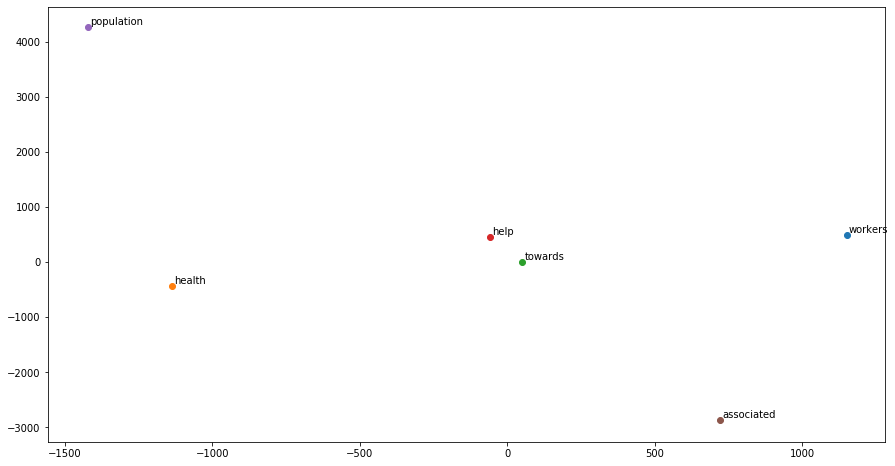

In [127]:
from sklearn.manifold import  TSNE
vocab = ['workers','health','towards','help','population','associated']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)